In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



Mean Absolute Error: 60.88025244130977
Root Mean Squared Error: 171.95430779643962
R-squared: 0.11607623252191368


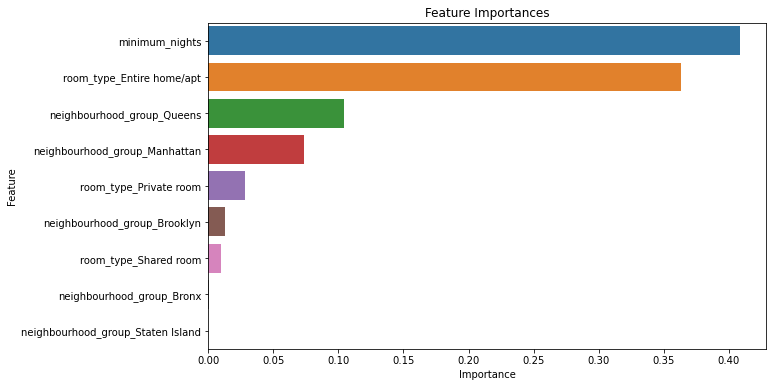

['pricing_model.pkl']

In [3]:
# Step 1: Data Preprocessing
# Load the dataset and handle missing values
df = pd.read_csv('data/NYC_air_bnb_dataset.csv')
df = df.dropna()

# Split the data into features (X) and target (y)
X = df[['neighbourhood_group', 'room_type', 'minimum_nights']]  # Add relevant features
y = df['price']

# Encode categorical variables (one-hot encoding)
X = pd.get_dummies(X, columns=['neighbourhood_group', 'room_type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Engineering
# Create additional features or transformations if needed

# Step 3: Model Selection
# Choose and initialize a regression model
model = RandomForestRegressor()

# Step 4: Model Training
# Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Predict prices on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Step 6: Interpretability
# Analyze feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 7: Deployment (Optional)
# Document the deployment process

# Save the trained model for deployment
import joblib
joblib.dump(model, 'pricing_model.pkl')